In [16]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [17]:
mpl.__version__

'3.6.2'

In [21]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [22]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import plot_tsne_colors, plot_label_tags

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [24]:
plt.style.use("../matplotlib_style.txt")

# Fig 2: covid

## Import

In [25]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [26]:
tsne = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [27]:
mask_covid_2 = np.load(variables_path / "mask_covid_2.npy")

In [29]:
# load
pickle_in = open(variables_path / "covid_legend.pkl", "rb")
covid_legend = pickle.load(pickle_in)

covid_colors = np.load(variables_path / "covid_colors.npy", allow_pickle=True)

## Plot

In [31]:
# mask island 1
tsne = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

right = 15
left = -15
top = -40
bottom = -85

mask_covid_island = (
    mask_covid_2
    & (tsne[:, 0] < right)
    & (tsne[:, 0] > left)
    & (tsne[:, 1] < top)
    & (tsne[:, 1] > bottom)
)

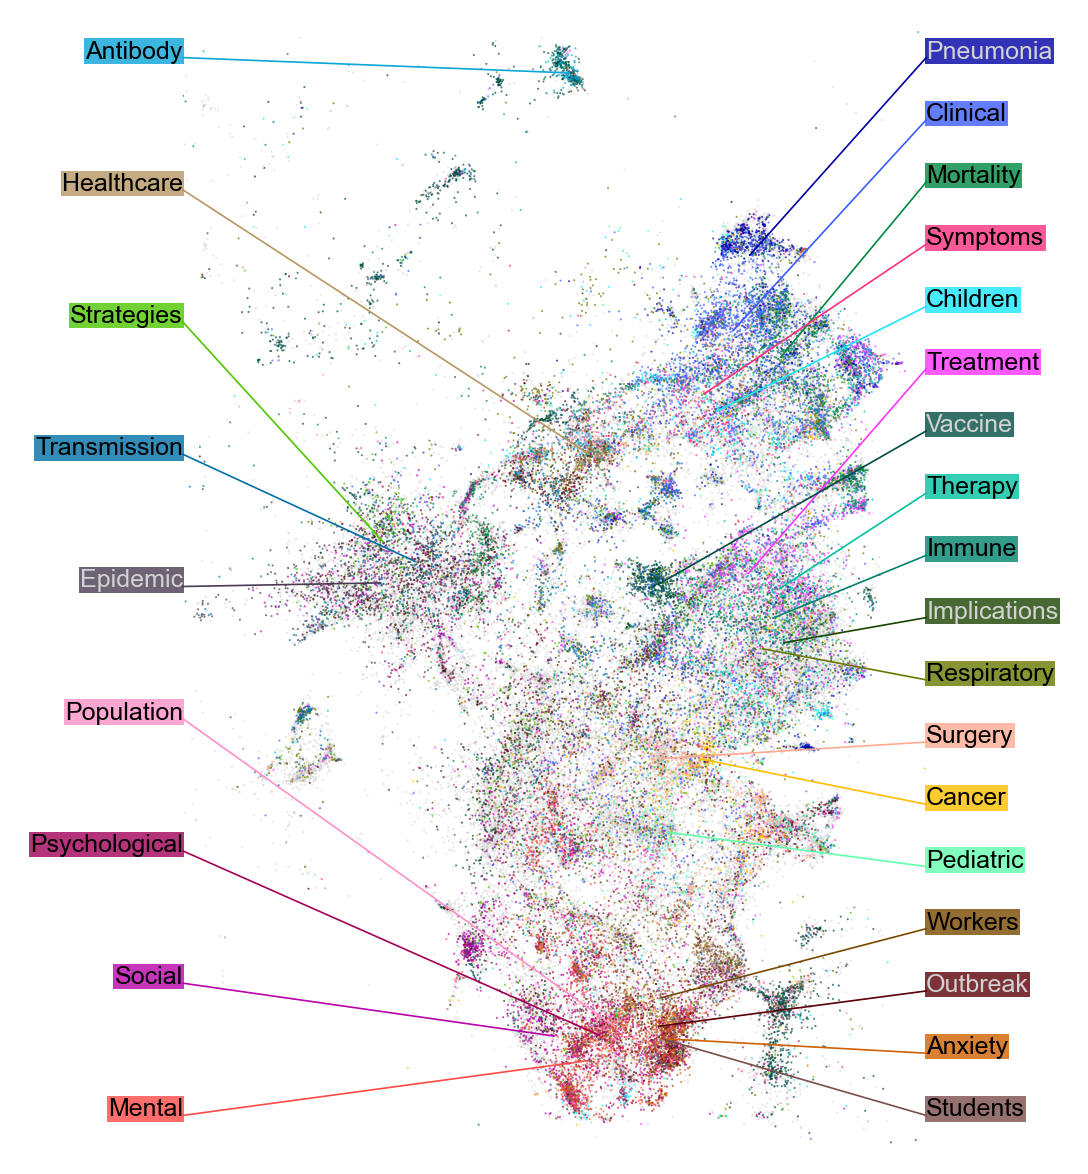

In [33]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(3.5, 3.8), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

tsne_covid = tsne[mask_covid_island]
x_lim = (-15, 11)
y_lim = (-83, -44)

plot_tsne_colors(
    tsne_covid,
    covid_colors,
    x_lim,
    y_lim,
    ax=ax,
    plot_type="subregion",
    axis_on=False,
)
plot_label_tags(
    tsne_covid,
    covid_colors,
    covid_legend,
    x_lim,
    y_lim=(-82, -45),
    ax=ax,
    middle_value=1,
    fontsize=6,
    subset=False,
)

fig.savefig(figures_path / "fig_2_covid.png")
fig.savefig(figures_path / "fig_2_covid.pdf")